In [2]:
import pandas as pd
import seaborn as sb
import statistics as st

In [3]:
#Importar os dados
dataset = pd.read_csv('Churn.csv', sep=';')
# Exibir os dados iniciais
dataset.head()                      

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
dataset.tail()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0
998,1000,811,PR,Feminino,28,4,16773882,2,1,1,990342.0,0


In [5]:
len(dataset)

999

In [6]:
#tamanho
dataset.shape
#999 linhas, 12 colunas

(999, 12)

In [7]:
# Primeiro problema é dar nomes para as colunas
# Lembrad de usar nomenclatura computacional, sem acentos
dataset.columns = ['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo', 'Produtos', 'TemCartCredito', 'Ativo', 'Salario', 'Saiu']

In [8]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [9]:
# Análise Exploratória
# Explorar dados categóricos
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

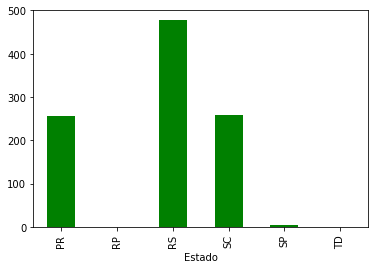

In [10]:
# Verificado dois problemas, estados inexistentes e estado fora da região sul
#imprimir um gráfico de barras comum
agrupado.plot.bar(color='green')

In [11]:
# Agrupar por Genero
agrupado_genero = dataset.groupby(['Genero']).size()
agrupado_genero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

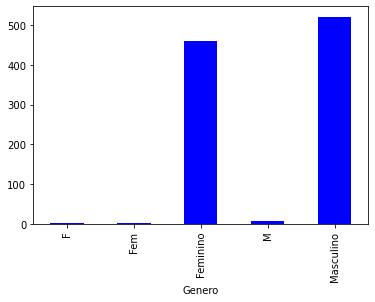

In [12]:
agrupado_genero.plot.bar(color='blue')

In [13]:
# Explorar colunas numericas
# Score
# Describe dá informações iniciais sobre os dados estudados(minimo, maximo, media, mediana, desvio padrão)
# Utilizei o round pra melhorar a visualização
dataset['Score'].describe().round(2)

count    999.00
mean     648.62
std       98.26
min      376.00
25%      580.00
50%      653.00
75%      721.00
max      850.00
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

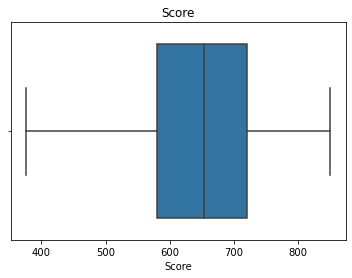

In [14]:
# Gera gráfico boxplot
sb.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

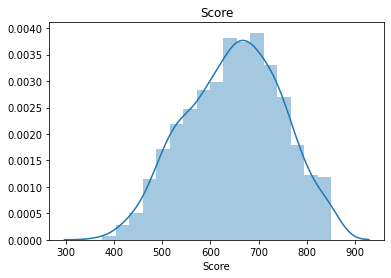

In [15]:
# Gera dados com histograma(distplot)
sb.distplot(dataset['Score']).set_title('Score')

In [16]:
# Idade 
dataset['Idade'].describe().round(2)

count    999.0
mean      38.9
std       11.4
min      -20.0
25%       32.0
50%       37.0
75%       44.0
max      140.0
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

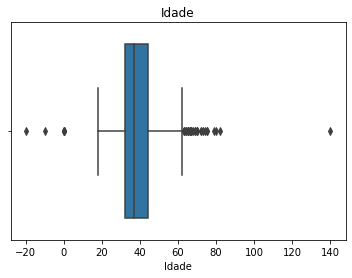

In [17]:
sb.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

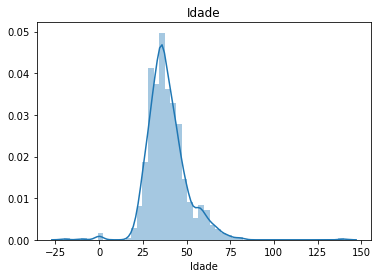

In [18]:
sb.distplot(dataset['Idade']).set_title('Idade')

In [19]:
# Saldo
dataset['Saldo'].describe().round(2)

count         999.00
mean      7164927.56
std       6311840.13
min             0.00
25%             0.00
50%       8958835.00
75%      12586844.00
max      21177431.00
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

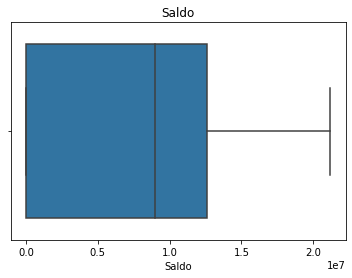

In [20]:
sb.boxplot(dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

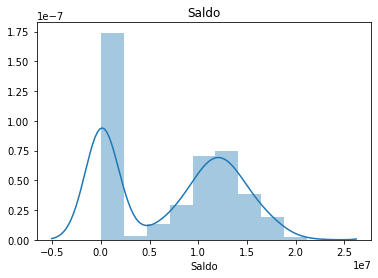

In [21]:
sb.distplot(dataset['Saldo']).set_title('Saldo')

In [22]:
# Salario
dataset['Salario'].describe().round(2)

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

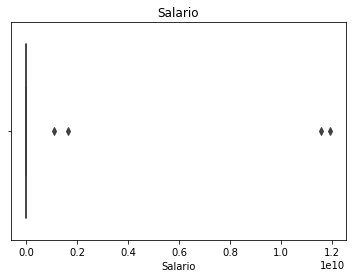

In [23]:
sb.boxplot(dataset['Salario']).set_title('Salario')

Text(0.5, 1.0, 'Salario')

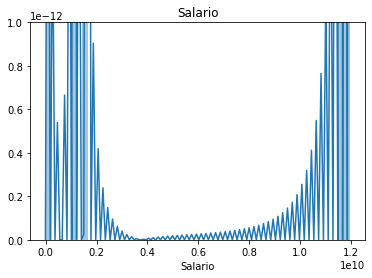

In [24]:
sb.distplot(dataset['Salario']).set_title('Salario')

In [25]:
#Contamos valores NAN
#genero e salario
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [26]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [27]:
mediana = st.median(dataset['Salario'])

In [28]:
mediana

70518.0

In [29]:
# substituir os valores NAN pela mediana de salario
dataset['Salario'].fillna(mediana, inplace=True)

In [30]:
dataset['Salario'].describe()

count    9.990000e+02
mean     3.504085e+07
std      5.287241e+08
min      9.677000e+03
25%      2.856485e+06
50%      8.641028e+06
75%      1.402954e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [31]:
# verificamos se não há mais NAN
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [32]:
dataset['Salario'].isnull().sum()

0

In [34]:
# Genero, falta padronizacão e tem NAN
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [35]:
# total de NaN
dataset['Genero'].isnull().sum()

8

In [36]:
# preencher NaN com moda(nesse caso masculino).
dataset['Genero'].fillna('Masculino', inplace=True)

In [37]:
dataset['Genero'].isnull().sum()

0

In [40]:
# Padroniza de acordo como o dominio
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['F','Fem']), 'Genero'] = "Feminino"
# Visualiza o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [42]:
# idades fora do dominio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [43]:
# Visualizar
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [44]:
# Calcular a mediana
mediana = st.median(dataset['Idade'])
mediana

37

In [47]:
# utilizamos a mediana para substituir os valores fora pq é mais preciso do q a media. menor chance de outliners
# para substituir
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana

In [48]:
# Verificamos se ainda temos valores fora do dominio
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [49]:
# Verificar dados duplicados pelo ID
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [51]:
# Excluir duplicados por Id
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)
# Verificamos se ainda há duplicados
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [52]:
# Estado fora do dominio
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [54]:
# atribuimos a moda - RS
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = "RS"
# Verificar se ainda há erro
agrupado = dataset.groupby(['Estado']).size()
agrupado             

Estado
PR    257
RS    480
SC    258
dtype: int64

In [55]:
# outliers, vamos consideraro os salarios com diferenca de dois desvios padrao como outliers
desv = st.stdev(dataset['Salario'])
desv

529784177.6096346

In [56]:
# definir padrao como maior que dois desvios padrao
# checamos se algum atende o criterio
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [57]:
# vamos atualizar os salarios para a mediana
mediana = st.median(dataset['Salario'])
mediana

8641028.0

In [58]:
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana
# checamos se algum ainda atende o criterio
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [59]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [60]:
dataset.tail()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0
998,1000,811,PR,Feminino,28,4,16773882,2,1,1,990342.0,0


In [62]:
dataset.shape

(995, 12)